# Make the raw CSVs into a dataset

In [ ]:
# imports
import pandas as pd
import numpy as np
import os
import scipy
from scipy import stats
import matplotlib.pyplot as plt

Flow for generation of dataset

1. Generate average IgE standard curve per batch
2. Scale each membrane up to the average PBS value
3. Minus each membrane by the batch blank
4. Minus the absorbance value of each membrane by the respective blank (if we already minus by the batch blank, do we even still need to minus by the respective blank?)
5. Approximate sIgE level from absorbance based on average IgE standard curve
6. Create final dataset

## 1. Generate average IgE standard curve and average PBS

- Get the average of all the different IgE standards
- Get the average of all the PBS
- Minus the PBS value from all the IgE standards
- Plot log curve

In [ ]:
# Set directory of batch
batch_directory = "150222-CSV"

panel1 = pd.read_csv("First Stage Combine/" + batch_directory + "/1-combine.csv")
panel2 = pd.read_csv("First Stage Combine/" + batch_directory + "/2-combine.csv")

# Get the IgE values
panel1_ige = panel1.iloc[:,9:18]
panel2_ige = panel2.iloc[:,9:18]
combine_ige = pd.concat([panel1_ige, panel2_ige])

# Get average PBS values (index 6)
pbs_1 = panel1.iloc[:,6]
pbs_2 = panel2.iloc[:,6]
combine_pbs = pd.concat([pbs_1, pbs_2])

Plot the IgE standard curve and estimate with trendline and R2 value

- For now it seems the best fit is a linear curve

Equation: y = 0.009877154737707986*x + 167.7649319873053
R2: 0.952836739210302


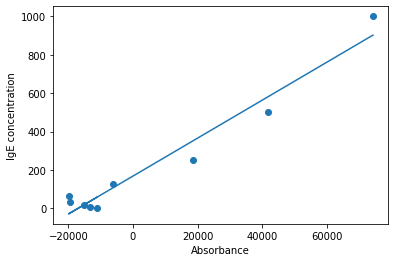

In [ ]:
# Test new IgE curve
ige1 = panel1_ige.mean(axis=0) - pbs_1.mean(axis=0)

ige_level = np.array([1000.0 / 2**i for i in range(9)])
x = ige_level

# Plot scatterplot
plt.scatter(ige1, ige_level)

# Add trendline
degree = 1
m1, b1, r, p_value, se = stats.linregress(ige1, ige_level)
plt.plot(ige1, m1*ige1 + b1)

plt.ylabel("IgE concentration")
plt.xlabel("Absorbance")

# Print equation and R2
print(f"Equation: y = {m1}*x + {b1}")
print(f"R2: {r ** 2}")

Equation: y = 0.009064239284945564*x + -44.372298285211684
R2: 0.9073630865432464


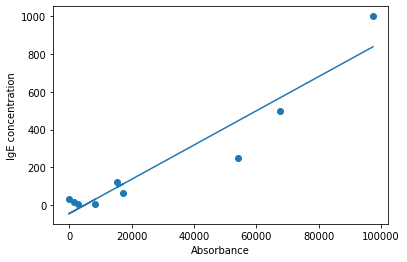

In [ ]:
# Test new IgE curve
ige2 = panel2_ige.mean(axis=0) - pbs_2.mean(axis=0)

# Plot scatterplot
plt.scatter(ige2, ige_level)

# Add trendline
m2, b2, r, p_value, se = stats.linregress(ige2, ige_level)
plt.plot(ige2, m2*ige2 + b2)

plt.ylabel("IgE concentration")
plt.xlabel("Absorbance")

# Print equation and R2
print(f"Equation: y = {m2}*x + {b2}")
print(f"R2: {r ** 2}")

## 2. Scale each membrane up to the average PBS value

In [ ]:
# Choose panel/batch/all
avg_pbs1 = pbs_1.mean(axis=0)
avg_pbs2 = pbs_2.mean(axis=0)

# Scale them up by panel (since their number of allergens are different)
# For panel 1
for index, row in panel1.iterrows():
    panel_pbs = row[6]
    scalar = avg_pbs1 / panel_pbs
    panel1.iloc[index,3:] *= scalar
    # print(panel1.iloc[index,:])

# Check new PBS values
# for index, row in panel1.iterrows():
    # print(row[6])

# For panel 2
for index, row in panel2.iterrows():
    panel_pbs = row[6]
    scalar = avg_pbs2 / panel_pbs
    panel2.iloc[index,3:] *= scalar
    # print(panel2.iloc[index,:])

# Check new PBS values
for index, row in panel2.iterrows():
    print(row[6])

343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.66666666674
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666666
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667
343022.6666666667


In [ ]:
panel1


,ID,Panel,Batch,0,1,2,3,4,5,6,...,126,127,128,129,130,131,132,133,134,135
0,30,1,150222-CSV,425550.804023,422130.876440,429610.763149,427563.433333,403838.312265,405209.367788,539927.525263,...,420514.604014,416478.549680,408282.290317,408631.608738,409391.164244,411311.258873,410787.666803,413185.086162,420154.489880,421180.853716
1,5,1,150222-CSV,436794.319679,429664.430317,427929.420258,427563.433333,388431.309797,382965.764431,539209.484890,...,454766.703514,439636.782967,432329.701089,428254.273205,431661.010282,427419.991772,428193.099598,426280.897022,428228.959988,424831.715368
2,2,1,150222-CSV,695477.774330,540054.616262,423424.325802,427563.433333,381607.909384,383057.586185,512078.821494,...,447972.113032,408028.516377,411381.786977,406429.365698,398709.479533,404496.096939,406259.009440,406080.959674,430917.803005,416293.542568
3,168,1,150222-CSV,465278.901419,438357.400801,422595.327614,427563.433333,416238.474038,407326.625375,630707.577898,...,463483.848076,430249.564055,420907.762495,411564.886052,405983.022573,399367.122377,399119.899462,403731.144277,428960.780247,416012.748767
4,61,1,150222-CSV,429795.563158,422615.502447,426308.991891,427563.433333,405619.114138,406350.440567,535936.828067,...,420931.705789,409954.049928,407932.071376,404406.702950,409656.605049,409527.927809,413890.021609,414668.551246,420771.990822,421390.158873
5,14,1,150222-CSV,413713.008166,415173.331588,427009.576865,427563.433333,398661.413950,392732.971004,461333.197456,...,436085.140054,429024.903456,427004.416711,422914.135089,424250.041478,421949.759748,422093.670693,421084.574022,424316.550123,425030.944698
6,220,1,150222-CSV,570262.067447,491466.854744,424260.493392,427563.433333,387560.934027,391204.572530,581997.806802,...,447782.974879,427488.969277,428894.605855,419426.450037,422518.238475,423739.244994,416841.629218,415596.141364,417746.418510,419332.604924
7,142,1,150222-CSV,423865.612314,420883.315326,426616.776800,427563.433333,413102.253112,413344.747885,481904.687823,...,424731.835933,418180.589993,418589.631729,416960.640954,418365.675398,417659.719594,418929.901829,418636.874854,422750.614773,423653.616268
8,169,1,150222-CSV,437002.574452,426044.021096,425574.982567,427563.433333,416693.472851,416211.397244,468176.303186,...,423766.384225,418059.106822,417197.178156,416125.471045,416337.323571,416667.102397,418117.773675,420267.410139,422526.083986,423636.013440
9,127,1,150222-CSV,430419.039411,398663.158568,420340.077149,427563.433333,394859.679648,390747.949397,571950.069165,...,422314.598174,406988.513259,408751.539621,406143.390861,410542.822354,408667.626758,410690.097989,411619.133250,416975.000122,415946.639432


## 3. Minus each membrane by batch blank

In [ ]:
# Similarly, do by panel
subtracted1 = panel1.copy(deep=True).iloc[:,3:]
to_subtract1 = panel1.loc[panel1["ID"] == "B"].iloc[:,3:]
sub1 = pd.DataFrame(subtracted1.values - to_subtract1.values, columns=subtracted1.columns)

sub1

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,3019.765245,4328.224786,1570.681088,0.000000e+00,-1163.880273,1601.005666,67890.900362,30762.443051,22977.029402,1160.433825,...,-7078.991937,-7376.469243,-13998.716239,-11580.877281,-12045.685908,-11422.583818,-13005.836256,-10065.886664,-6033.369358,-4945.489658
1,14263.280901,11861.778663,-110.661803,0.000000e+00,-16570.882741,-20642.597691,67172.859989,14207.851215,-10507.230805,-37455.319149,...,27173.107564,15781.764045,10048.694532,8041.787186,10224.160131,4686.149081,4399.596539,3029.924196,2041.100750,-1294.628006
2,272946.735552,122251.964607,-4615.756258,0.000000e+00,-23394.283155,-20550.775937,40042.196593,20380.125166,-8200.260238,-39189.407638,...,20378.517081,-15826.502546,-10899.219580,-13783.120320,-22727.370618,-18237.745752,-17534.493619,-17170.013152,4729.943767,-9832.800806
3,42747.862641,20554.749147,-5444.754447,0.000000e+00,11236.281500,3718.263253,158670.952997,71315.446152,90484.410219,8294.305783,...,35890.252126,6394.545132,-1373.244062,-8647.599966,-15453.827578,-23366.720314,-24673.603597,-19519.828548,2772.921009,-10113.594607
4,7264.524380,4812.850793,-1731.090170,0.000000e+00,616.921600,2742.078445,63900.203167,29573.347569,18147.205810,-5539.382398,...,-6661.890161,-13900.968995,-14348.935181,-15805.783068,-11780.245102,-13205.914882,-9903.481450,-8582.421579,-5415.868416,-4736.184501
5,-8818.030612,-2629.320066,-1030.505196,0.000000e+00,-6340.778588,-10875.391117,-10703.427444,-968.378279,-35980.394937,-25163.755224,...,8491.544104,5169.884533,4723.410155,2701.649071,2813.191327,-784.082944,-1699.832366,-2166.398804,-1871.309115,-1095.398676
6,147731.028669,73664.203089,-3779.588669,-5.820766e-11,-17441.258511,-12403.789592,109961.181901,99646.639611,22135.095276,-9710.076625,...,20189.378928,3633.950354,6613.599298,-786.035982,1081.388324,1005.402303,-6951.873841,-7654.831461,-8441.440728,-6793.738450
7,1334.573536,3080.663672,-1423.305261,0.000000e+00,8100.060574,9736.385763,9868.062923,24595.072767,2031.121624,-14048.851280,...,-2861.760018,-5674.428930,-3691.374827,-3251.845064,-3071.174753,-5074.123097,-4863.601230,-4614.097972,-3437.244465,-2472.727106
8,14471.535674,8241.369441,-2465.099493,0.000000e+00,11691.280313,12603.035122,-3860.321715,12855.912759,17231.204628,9543.552080,...,-3827.211725,-5795.912101,-5083.828401,-4087.014973,-5099.526581,-6066.740294,-5675.729384,-2983.562687,-3661.775252,-2490.329934
9,7888.000633,-19139.493086,-7700.004911,0.000000e+00,-10142.512890,-12860.412725,99913.444264,45617.144188,12337.779909,-31628.710173,...,-5278.997777,-16866.505664,-13529.466936,-14069.095158,-10894.027798,-14066.215933,-13103.405069,-11631.839575,-9212.859116,-10179.703941


In [ ]:
subtracted2 = panel2.copy(deep=True).iloc[:,3:]
to_subtract2 = panel2.loc[panel2["ID"] == "B"].iloc[:,3:]
sub2 = pd.DataFrame(subtracted2.values - to_subtract2.values, columns=subtracted2.columns)

sub2

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,84751.508023,4488.817492,-12860.087201,0.000000e+00,1515.749927,-1297.072063,-10709.283039,2166.247568,17.561922,-5163.740659,...,-38826.143524,-40577.796553,-25056.619853,-38938.398443,-37573.775528,-23273.385497,29563.091104,-40348.268037,-26406.433813,-50810.458620
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-20262.690177,-23320.256509,-12403.385852,0.000000e+00,-848.902565,4034.631339,-100791.007810,-59240.344905,-60875.580779,-17284.021750,...,-66841.224683,-66782.626241,-55335.256251,-69277.610416,-72603.884110,-60982.663383,-59742.209077,-88895.866645,-94494.917256,-123621.299862
3,22353.185726,-12738.880051,-13292.319202,0.000000e+00,795.087936,6803.580950,-96992.349057,-66928.009363,-66065.167334,-35503.142657,...,-66490.853634,-64078.193878,-54308.021199,-68672.767003,-69629.127343,-65116.418788,-54059.248817,-89468.926624,-92989.960653,-121870.567779
4,-25400.043683,-18378.480991,-12766.251331,0.000000e+00,-519.044734,2787.923362,-108858.167076,-81867.504449,-75673.641752,-32572.196722,...,-57013.640159,-61184.944136,-52973.673159,-60839.648128,-62223.550862,-61078.195926,-45156.678384,-82859.476755,-89748.417373,-111468.030375
5,-13355.701110,-5873.410606,-7696.445690,0.000000e+00,-3668.193337,-877.159554,-28457.836001,-12199.258815,-8867.079380,7874.375373,...,-26760.955578,-32149.075008,-19619.415959,-17544.509735,-10968.653495,1650.624353,32237.723163,-27006.600945,-10043.294898,-38431.098465
6,-20799.714890,-27963.742969,-14684.054816,0.000000e+00,-218.994011,3722.902838,-116416.713820,-62328.446521,-79675.440129,-27546.826702,...,-61498.100145,-57494.466509,-50257.915764,-64015.724907,-66293.801579,-56852.728667,-46795.840527,-86506.927030,-92118.995482,-116466.752779
7,105636.732940,-11695.245934,-12282.778713,0.000000e+00,9.754809,-1336.789383,-34286.411922,-32751.125812,-23304.145909,-19919.589021,...,-49570.951496,-47715.299176,-33851.695403,-44178.819934,-43965.442980,-28340.326828,23212.803287,-59853.889660,-61387.070206,-79091.152438
8,48849.130635,21569.906334,-1372.435992,0.000000e+00,986.241229,-2071.079024,7138.841573,64361.406961,9497.576780,-22835.635359,...,-92219.929088,-109074.850495,-106997.169008,-113108.341948,-104859.942801,-68993.608354,-41201.228936,-83385.387103,-74754.069023,-81753.736242
9,-19846.348990,-20571.238265,-14940.934351,0.000000e+00,995.656296,4467.574050,-95602.263781,-62490.286292,-68379.688735,-37267.202154,...,-60193.622422,-55606.947172,-38099.808156,-62840.174895,-65421.219747,-60688.988222,-45993.560386,-88024.236298,-85046.470750,-117113.886474


## 5. Approximate sIgE level from absorbance based on average IgE standard curve

Apply the equation: IU = m * absorbance + b

In [ ]:
# For this, we use their respective IgE surces
sige_1 = sub1.applymap(lambda x : m1*x + b1)
sige_1

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,197.591621,210.515478,183.278792,167.764932,156.269106,183.578313,838.333860,471.610342,394.712607,179.226716,...,97.844633,94.906404,29.497446,53.378815,48.787828,54.942304,39.304275,68.342612,108.172409,118.917565
1,308.645565,284.925555,166.671908,167.764932,4.091759,-36.125200,831.241664,308.098077,63.983387,-202.187051,...,436.157920,323.643857,267.017443,247.194908,268.750544,214.050752,211.220428,197.691962,187.925200,154.977691
2,2863.702074,1375.266503,122.174393,167.764932,-63.304023,-35.218262,563.267904,369.062582,86.769693,-219.314911,...,369.046699,11.444117,60.111654,31.626920,-56.716824,-12.372105,-5.425975,-1.825945,214.483318,70.644837
3,589.992186,370.787370,113.986250,167.764932,278.747423,204.490793,1734.982487,872.158629,1061.493453,249.689074,...,522.258506,230.924844,154.201188,82.351249,15.125086,-63.031780,-75.940069,-25.035435,195.153502,67.871393
4,239.517763,215.302204,150.666687,167.764932,173.858362,194.848865,798.917126,459.865462,347.007692,113.051595,...,101.964412,30.462910,26.038279,11.648767,51.409628,37.328067,69.946713,82.995026,114.271562,120.984905
5,80.667879,141.794731,157.586473,167.764932,105.136081,60.347011,62.045523,158.200110,-187.618996,-80.781372,...,251.637227,218.828681,214.418785,194.449538,195.551258,160.020423,150.975425,146.367076,149.281722,156.945510
6,1626.927162,895.357665,130.433350,167.764932,-4.505077,45.250783,1253.868541,1151.990211,386.396693,71.857003,...,367.178552,203.658022,233.088476,160.001133,178.445972,177.695446,99.100198,92.156977,84.387516,100.662126
7,180.946721,198.193124,153.706726,167.764932,247.770484,263.932721,265.233316,410.694271,187.826635,29.002254,...,139.498885,111.717719,131.304652,135.645955,137.430464,117.647033,119.726390,122.190772,133.814737,143.341424
8,310.702529,249.166213,143.416763,167.764932,283.241517,292.247060,129.635937,294.744772,337.960206,262.028073,...,129.962970,110.517811,117.551172,127.396853,117.396119,107.842799,111.704875,138.295822,131.597011,143.167558
9,245.675935,-21.278803,91.710792,167.764932,67.585763,40.740646,1154.625481,618.332524,289.627093,-144.636733,...,115.623454,1.171846,34.132294,28.802302,60.162934,28.830741,38.340573,52.875453,76.768097,67.218421


In [ ]:
sige_2 = sub2.applymap(lambda x : m2*x + b2)
sige_2

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,723.835650,-3.684582,-160.939206,-44.372298,-30.633178,-56.129270,-141.443802,-24.736912,-44.213113,-91.177679,...,-396.301754,-412.179156,-271.491496,-397.319259,-384.949991,-255.327833,223.594633,-410.098655,-283.726533,-504.930453
1,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,...,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298,-44.372298
2,-228.038171,-255.752683,-156.799556,-44.372298,-52.066954,-7.801434,-957.966111,-581.340960,-596.163129,-201.038807,...,-650.237153,-649.706003,-545.944302,-672.321136,-702.471277,-597.133751,-585.889977,-850.145705,-900.896840,-1164.905341
3,158.242326,-159.840555,-164.857060,-44.372298,-37.165431,17.296987,-923.534159,-651.023790,-643.202783,-366.181279,...,-647.061306,-625.192381,-536.633198,-666.838691,-675.507370,-634.603100,-534.378265,-855.340058,-887.255553,-1149.036286
4,-274.604372,-210.959248,-160.088655,-44.372298,-49.077044,-19.101894,-1031.088773,-786.438948,-730.296295,-339.614483,...,-561.157575,-598.967273,-524.538348,-595.837427,-608.381452,-597.999681,-453.683236,-795.430423,-857.873429,-1054.745198
5,-165.431569,-97.610297,-114.134724,-44.372298,-77.621680,-52.323082,-302.320933,-154.949299,-124.745628,27.002924,...,-286.940003,-335.779207,-222.207379,-203.399933,-143.794798,-29.410644,247.838138,-289.166592,-135.407126,-392.720971
6,-232.905891,-297.842356,-177.472085,-44.372298,-46.357312,-10.627016,-1099.601249,-609.332252,-766.569553,-294.063327,...,-601.805794,-565.515900,-499.922073,-624.626147,-645.275179,-559.699035,-468.540994,-828.491785,-879.360916,-1100.054814
7,913.144326,-150.380806,-155.706344,-44.372298,-44.283878,-56.489277,-355.152540,-341.236339,-255.606653,-224.928220,...,-493.695264,-476.875188,-351.212166,-444.819693,-442.885594,-301.255802,166.034105,-586.902276,-600.799392,-761.273429
8,398.407911,151.142494,-56.812387,-44.372298,-35.432772,-63.145054,20.335870,539.014895,41.716010,-251.359961,...,-880.275802,-1033.052843,-1014.220241,-1069.613375,-994.847911,-669.746874,-417.830096,-800.197400,-721.961067,-785.407726
9,-224.264354,-230.834924,-179.800502,-44.372298,-35.347431,-3.877138,-910.934093,-610.799206,-664.182159,-382.171136,...,-589.981695,-548.406973,-389.718076,-613.970680,-637.365888,-594.471809,-461.268935,-842.245039,-815.253860,-1105.920589


## 6. Add them all together to create the final dataset

- Sort by id
- Compare the IU for the controls (just to see)
- Add the allergens from panel 2 to panel 1 by index
- Add in the names
- Export

Sort by id

In [ ]:
final_1 = sige_1.copy(deep=True)
final_2 = sige_2.copy(deep=True)

# Add back batch, panel, ID
final_1.insert(0, "Batch", panel1["Batch"])
final_1.insert(0, "Panel", panel1["Panel"])
final_1.insert(0, "ID", panel1["ID"])
final_2.insert(0, "Batch", panel2["Batch"])
final_2.insert(0, "Panel", panel2["Panel"])
final_2.insert(0, "ID", panel2["ID"])

# Remove blank
final_1 = final_1[final_1["ID"] != "B"]
final_2 = final_2[final_2["ID"] != "B"]

# Change ID type to int
final_1["ID"] = pd.to_numeric(final_1["ID"])
final_2["ID"] = pd.to_numeric(final_2["ID"])

# Sort by ID
final_1 = final_1.sort_values("ID").reset_index(drop=True)
final_2 = final_2.sort_values("ID").reset_index(drop=True)

final_1

,ID,Panel,Batch,0,1,2,3,4,5,6,...,126,127,128,129,130,131,132,133,134,135
0,1,1,150222-CSV,404.842907,246.052484,148.914793,167.764932,73.325023,23.172530,386.052954,...,327.385790,283.509965,267.776088,271.891715,241.685272,247.922709,210.865737,241.105086,206.639871,148.537346
1,2,1,150222-CSV,2863.702074,1375.266503,122.174393,167.764932,-63.304023,-35.218262,563.267904,...,369.046699,11.444117,60.111654,31.626920,-56.716824,-12.372105,-5.425975,-1.825945,214.483318,70.644837
2,4,1,150222-CSV,304.205563,172.176916,138.640912,167.764932,-71.431153,-136.247976,948.071283,...,341.379382,99.967410,29.910340,-52.830669,-56.748325,-86.893605,-66.932132,-51.922606,-21.070704,21.115552
3,5,1,150222-CSV,308.645565,284.925555,166.671908,167.764932,4.091759,-36.125200,831.241664,...,436.157920,323.643857,267.017443,247.194908,268.750544,214.050752,211.220428,197.691962,187.925200,154.977691
4,8,1,150222-CSV,719.537300,557.288284,129.686919,167.764932,270.830504,269.738184,51.060212,...,244.230399,167.956968,145.775506,143.571702,133.314280,116.196391,99.541088,95.730853,115.211603,124.652461
5,10,1,150222-CSV,184.198370,209.216230,148.219022,167.764932,227.558378,228.380551,282.455593,...,165.783200,136.603085,115.680252,118.548129,114.752288,98.121485,94.886683,129.011256,113.741321,125.785212
6,14,1,150222-CSV,80.667879,141.794731,157.586473,167.764932,105.136081,60.347011,62.045523,...,251.637227,218.828681,214.418785,194.449538,195.551258,160.020423,150.975425,146.367076,149.281722,156.945510
7,15,1,150222-CSV,206.353417,121.125310,161.272657,167.764932,224.085626,218.404852,224.488173,...,143.066326,126.286357,158.868808,178.044258,184.257045,167.756607,167.955840,167.943113,166.511550,160.286520
8,27,1,150222-CSV,327.031192,235.825566,210.831792,167.764932,186.100737,160.083170,518.720124,...,168.766077,139.386816,149.304292,137.543460,158.448882,123.168592,144.063639,163.367978,150.927440,151.594359
9,30,1,150222-CSV,197.591621,210.515478,183.278792,167.764932,156.269106,183.578313,838.333860,...,97.844633,94.906404,29.497446,53.378815,48.787828,54.942304,39.304275,68.342612,108.172409,118.917565


Compare controls

In [ ]:
# Compare all common controls, except IgE, 
# which is the first 25 allergens, minus IgE (9) - 3 to 27

# For each id
for idx in final_1["ID"]:
    print(f"ID: {idx}")
    for i in range(22):
        index = i+3 # Skip first 3 columns
        p1 = final_1.iloc[:,index].loc[final_1["ID"] == idx]
        p2 = final_2.iloc[:,index].loc[final_2["ID"] == idx]
        
        print(f"  {p1.to_string()} VS {p2.to_string()}")

ID: 1
  0    404.842907 VS 0   -275.001901
  0    246.052484 VS 0   -236.238569
  0    148.914793 VS 0   -174.896311
  0    167.764932 VS 0   -44.372298
  0    73.325023 VS 0   -29.021289
  0    23.17253 VS 0    19.872172
  0    386.052954 VS 0   -875.10617
  0    302.874394 VS 0   -609.496607
  0    162.892956 VS 0   -713.868638
  0    51.985509 VS 0   -319.804776
  0   -59.319565 VS 0   -512.06474
  0   -161.523038 VS 0   -362.259388
  0   -196.233813 VS 0   -414.065567
  0   -274.073326 VS 0   -477.071525
  0   -331.335248 VS 0   -529.004475
  0   -226.042234 VS 0   -516.76572
  0   -270.282147 VS 0   -622.691327
  0   -136.544752 VS 0   -683.818704
  0    319.185971 VS 0   -193.327738
  0    266.874074 VS 0    116.29286
  0    218.320547 VS 0    35.723054
  0    176.779333 VS 0    212.723205
ID: 2
  1    2863.702074 VS 1    324.482764
  1    1375.266503 VS 1   -160.234953
  1    122.174393 VS 1   -175.60983
  1    167.764932 VS 1   -44.372298
  1   -63.304023 VS 1   -41.272673
  1 

<AxesSubplot:xlabel='Control', ylabel='sIgE'>

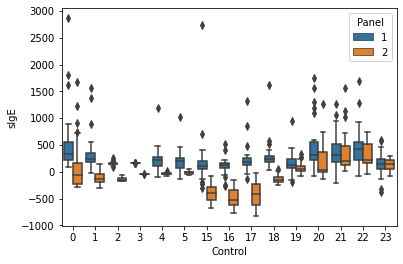

In [ ]:
# Visualise the group difference with boxplot
# See if combined or separate IgE curve is better
import seaborn as sns

control_df = pd.concat([final_1, final_2]).iloc[:,:27]
# Remove IgE standards - 9 to 17
control_df.drop(control_df.columns[9:18], axis=1, inplace=True)
# Drop ID and Batch for simplicity
control_df.drop(columns=["ID", "Batch"], inplace=True)
control_long = pd.melt(control_df, "Panel", 
                       var_name="Control", value_name="sIgE")

sns.boxplot(x="Control", y="sIgE", hue="Panel", 
            data=control_long)

Surprisingly I am still seeing the difference, even when using separate IgE curves instead of combined. Could be due to batch effect then

In [ ]:
control_long

,Panel,Control,sIgE
0,1,0,404.842907
1,1,0,2863.702074
2,1,0,304.205563
3,1,0,308.645565
4,1,0,719.537300
...,...,...,...
865,2,23,41.960919
866,2,23,233.844727
867,2,23,133.523414
868,2,23,250.004397


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=72487218-bfd4-4a63-a450-c076490888ed' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>